In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)

<h1>Introduction </h1>

<h1> Initial Exploration </h1>

<h1> Initial preprocessing and cleaning </h1>

<h1> Exploration and visualization </h1>

<h1> Final preprocessing and cleaning </h1>

<b>Five datasets</b> <br>
    1. Regular dataset <br>
    2. Dataset converted all categorial values to numeric using dummy variables<br>
    2.1 Dataset with dummy variables and scaled data<br>
    3. Dataset converted all categorical values to numeric using encoders<br>
    3.1 Dataset with encoded variables and scaled data<br>

<h1> Machine Learning </h1>

Knn, Classification Trees, Logistic Regression, Naive Bayes, 

###### Import the data

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/dblilienthal/CSV_Files/main/health_insurance_data/train.csv') # This is to get the data online
df = pd.read_csv("C:/Users/dlili/OneDrive/Documents/CSUMB/Fall 2020/CST383 Data Science/Project 2/health_insurance_data.csv") # This is my local data link

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df['Response'][df['Response'] == 1].value_counts()

1    46710
Name: Response, dtype: int64

In [6]:
df['Response'][df['Response'] == 0].value_counts()

0    334399
Name: Response, dtype: int64

In [7]:
 46710 / 334399

0.13968343206767964

In [8]:
46710 / ( 46710 + 334399)

0.12256336113815208

In [9]:
for col in df.columns:
    print(col)
    print("There are {} many unique values \n".format(df[col].value_counts().count()))

id
There are 381109 many unique values 

Gender
There are 2 many unique values 

Age
There are 66 many unique values 

Driving_License
There are 2 many unique values 

Region_Code
There are 53 many unique values 

Previously_Insured
There are 2 many unique values 

Vehicle_Age
There are 3 many unique values 

Vehicle_Damage
There are 2 many unique values 

Annual_Premium
There are 48838 many unique values 

Policy_Sales_Channel
There are 155 many unique values 

Vintage
There are 290 many unique values 

Response
There are 2 many unique values 



In [10]:
# Check for missing data
df.isna().mean()

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [11]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<AxesSubplot:>

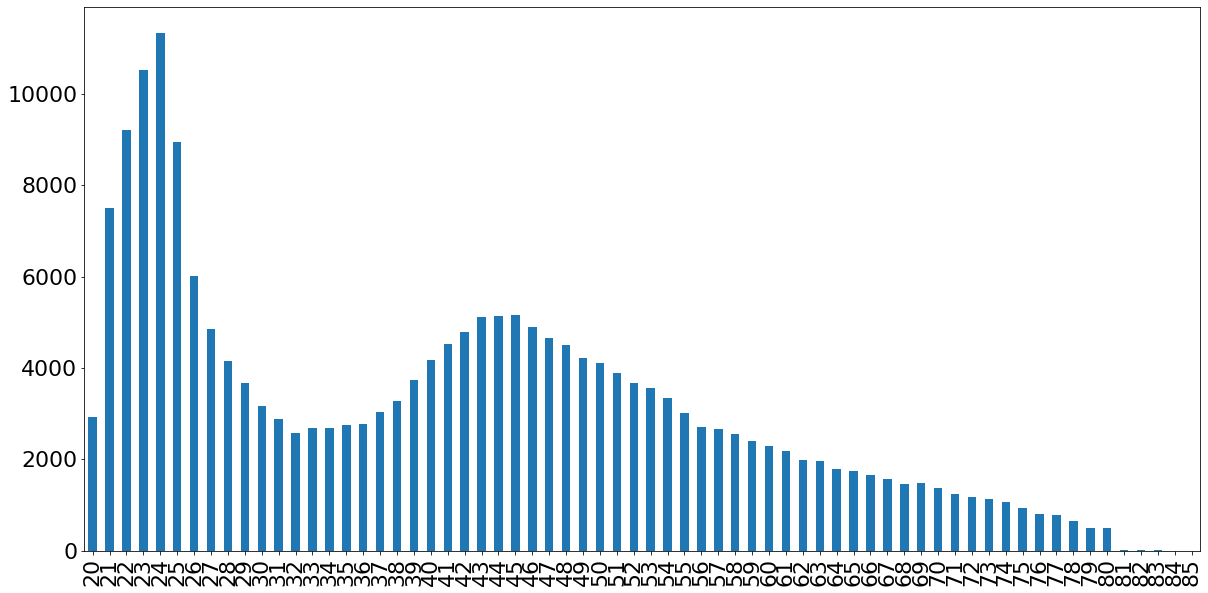

In [33]:
df['Age'][df['Gender'] == 'Male'].value_counts(sort=False).plot.bar()

<AxesSubplot:>

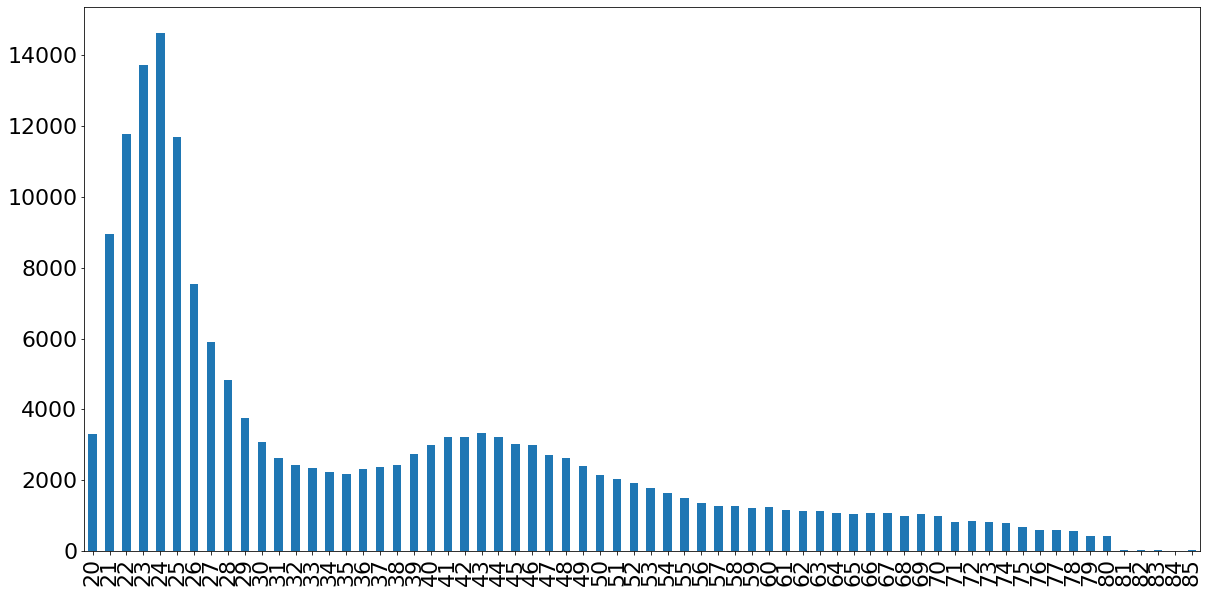

In [46]:
df['Age'][df['Gender'] != 'Male'].value_counts(sort=False).plot.bar()